# Baseline Linear Regression 

In [1]:
import pandas as pd 
import numpy as np 

## Setting Up the Data 

In [2]:
df = pd.read_csv('modeling_data.csv')
print(df.shape)
df.head()

(687, 20)


,TEAM_SEASON,LS_MIN,LS_EFG_PCT,LS_FTA_RATE,LS_TM_TOV_PCT,LS_OREB_PCT,LS_OPP_EFG_PCT,LS_OPP_FTA_RATE,LS_OPP_TOV_PCT,LS_OPP_OREB_PCT,HEIGHT_INCHES,WEIGHT,EXP,LS_WIN_PCT,LS_PO_WINS,LS_CONF_RANK,MADE_PLAYOFFS,PO_WINS,TEAM_ID,TEAM_NAME
0,1610612737_2001-02,18.097566,0.461098,0.324734,0.163691,0.266759,0.476202,0.355158,0.153661,0.286407,80.000000,224.615385,3.153846,0.305,0.0,13.0,0.0,0.0,1610612737,Hawks
1,1610612737_2002-03,17.691622,0.459190,0.296291,0.165052,0.252703,0.490334,0.332949,0.151786,0.301969,79.187500,224.562500,4.125000,0.402,0.0,12.0,0.0,0.0,1610612737,Hawks
2,1610612737_2003-04,16.653165,0.467314,0.320842,0.167814,0.275845,0.480911,0.323210,0.142232,0.289654,80.133333,227.000000,4.000000,0.427,0.0,11.0,0.0,0.0,1610612737,Hawks
3,1610612737_2004-05,13.812289,0.432378,0.324171,0.166552,0.250593,0.494104,0.375538,0.167617,0.286726,79.769231,225.923077,5.076923,0.341,0.0,12.0,0.0,0.0,1610612737,Hawks
4,1610612737_2005-06,21.489895,0.463531,0.327702,0.170385,0.274347,0.510406,0.369320,0.144927,0.280918,78.846154,223.615385,1.923077,0.159,0.0,15.0,0.0,0.0,1610612737,Hawks


In [3]:
def modeling_data_setup(data,test_seasons,this_season,model_type):
    # returns x, xtest, y, ytest, this season's data 
    
    target = 'PO_WINS'
    
    import pandas as pd
    import numpy as np 
    
    if type(test_seasons) == int:
        test_seasons = [test_seasons]
    elif type(test_seasons) == list:
        test_seasons = test_seasons
    else:
        raise TypeError("ERROR! Please enter the test_seasons as type int or list (of int)")
        
    for i in test_seasons:
        if type(i)!=int:
            raise TypeError("ERROR! Please enter the test_seasons as type int or list (of int)")
    
    import pandas as pd
    import numpy as np 
    from sklearn.model_selection import train_test_split
    
    print('columns to drop:')
    drop_cols = ['TEAM_SEASON','TEAM_ID','TEAM_NAME','PO_WINS','SEASON']
    print(drop_cols)
    
    print('Creating SEASON for splitting')
    ids = data['TEAM_SEASON'].str.split('_')
    season = [int(x[1][0:4]) for x in ids]
    data['SEASON'] = season
    
    print("Dropping this season: {}".format(this_season))
    current = data[data['SEASON']==this_season].copy()
    
    print('Dropping the Pelicans and Hornets first season')
    data = data[~data['LS_WIN_PCT'].isna()].copy()
    
    test = data[data['SEASON'].isin(test_seasons)].copy()
    train = data[(~data['SEASON'].isin(test_seasons))&(data['SEASON']!=this_season)].copy()
    ytest = test[target].copy()
    ytrain = train[target].copy()
    xtest = test.drop(drop_cols,axis=1)
    xtrain = train.drop(drop_cols,axis=1)
    
    print("Returning: Train, Test, X Train, X Test, Y Train, Y Test, and the Upcoming Season")
    
    return train,test,xtrain,xtest,ytrain,ytest,current

In [4]:
train, test, x_train, x_test, y_train, y_test, upcoming = modeling_data_setup(df,[2022],2023,'reg')

columns to drop:
['TEAM_SEASON', 'TEAM_ID', 'TEAM_NAME', 'PO_WINS', 'SEASON']
Creating SEASON for splitting
Dropping this season: 2023
Dropping the Pelicans and Hornets first season
Returning: Train, Test, X Train, X Test, Y Train, Y Test, and the Upcoming Season


In [5]:
id_cols = ['TEAM_SEASON','TEAM_ID','TEAM_NAME','SEASON']
train_ids = train[id_cols].copy()
test_ids = test[id_cols].copy()

## Modeling

In [6]:
# basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# for feature reduction 
from sklearn import feature_selection
from sklearn import pipeline

# for the modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import sklearn

# getting rid of the warnings 
import warnings
warnings.filterwarnings('ignore')

In [7]:
linreg = LinearRegression()

In [8]:
param_grid = {
                'fit_intercept': [True,False]
            }

clf = GridSearchCV(linreg, 
                           param_grid, 
                           scoring='neg_root_mean_squared_error', 
                           cv = 5,
                           return_train_score=True,
                           verbose = 10, 
                           n_jobs = -1
                  )

In [9]:
# Fitting the model 
clf.fit(x_train,y_train)

print("Tuned Hyperparameters :", clf.best_params_)
print("Best Score :",clf.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Tuned Hyperparameters : {'fit_intercept': False}
Best Score : -3.6884057720101913


In [10]:
# storing the CV results 
cv = pd.DataFrame(clf.cv_results_)

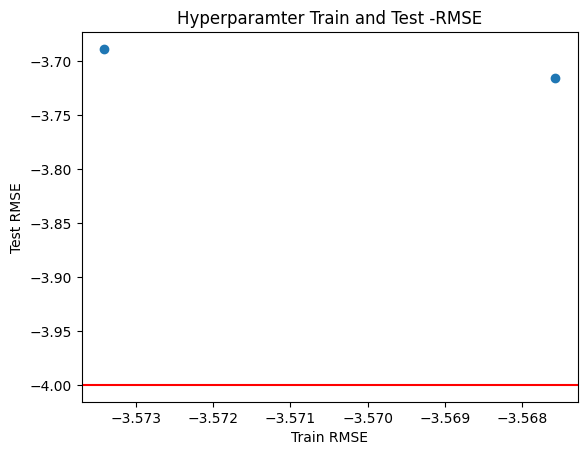

In [11]:
#Plotting the test and train gini to select best parameter
import matplotlib.pyplot as plt
plt.scatter(cv['mean_train_score'],cv['mean_test_score'] )
plt.axhline(0.-4, color='r', linestyle='-')
plt.xlabel('Train RMSE')
plt.ylabel('Test RMSE')
#for i in range(cv.shape[0]):
#    plt.text(x=cv['mean_train_score'][i],y=cv['mean_test_score'][i]+0.03,s=cv['rank_test_score'][i],fontdict=dict(size=5))
plt.title('Hyperparamter Train and Test -RMSE')
plt.show()

In [12]:
cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003312,0.000096,0.001220,0.000015,True,{'fit_intercept': True},-4.013669,-4.725944,-3.159988,-3.673808,...,-3.714998,0.621275,2,-3.499598,-3.310917,-3.701451,-3.581773,-3.744124,-3.567572,0.154782
1,0.003060,0.000040,0.001291,0.000032,False,{'fit_intercept': False},-3.973242,-4.665293,-3.155921,-3.657870,...,-3.688406,0.601348,1,-3.510289,-3.315812,-3.704942,-3.587817,-3.748201,-3.573412,0.153884


In [13]:
clf.best_estimator_.get_params()

{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': False}

## Evaluation

### Train 

In [14]:
predictions = clf.predict(x_train)

In [15]:
mse = sklearn.metrics.mean_squared_error(y_train,predictions)
mae = sklearn.metrics.mean_absolute_error(y_train,predictions)
r2 = sklearn.metrics.r2_score(y_train,predictions)
rmse = np.sqrt(mse)

In [16]:
train_output = pd.DataFrame({'Actual':y_train,'Prediction':predictions})
train_output['Team'] = train['TEAM_NAME']
train_output['Season'] = train['SEASON']
train_output.sort_values(['Season','Prediction'],inplace=True)
metrics_list = ['MSE','MAE','R2','RMSE']
values = [mse,mae,r2,rmse]
train_results = pd.DataFrame({'METRIC':metrics_list,'VALUE':values})
train_results = train_results.transpose().reset_index(drop=True)
train_results.columns = train_results.iloc[0,:]
train_results = train_results.tail(1)

In [17]:
train_output.tail()

,Actual,Prediction,Team,Season
433,6.0,5.421798,76ers,2021
295,7.0,6.877532,Bucks,2021
456,7.0,6.882027,Suns,2021
594,2.0,7.106931,Jazz,2021
341,0.0,7.334025,Nets,2021


In [18]:
train_results

,MSE,MAE,R2,RMSE
1,12.905339,2.617149,0.309029,3.5924


### Test 

In [19]:
predictions = clf.predict(x_test)

In [20]:
mse = sklearn.metrics.mean_squared_error(y_test,predictions)
mae = sklearn.metrics.mean_absolute_error(y_test,predictions)
r2 = sklearn.metrics.r2_score(y_test,predictions)
rmse = np.sqrt(mse)

In [21]:
test_output = pd.DataFrame({'Actual':y_test,'Prediction':predictions})
test_output['Team'] = test['TEAM_NAME']
test_output['Season'] = test['SEASON']
test_output.sort_values(['Season','Prediction'],inplace=True)
metrics_list = ['MSE','MAE','R2','RMSE']
values = [mse,mae,r2,rmse]
test_results = pd.DataFrame({'METRIC':metrics_list,'VALUE':values})
test_results = test_results.transpose().reset_index(drop=True)
test_results.columns = test_results.iloc[0,:]
test_results = test_results.tail(1)

In [22]:
test_output.head()

,Actual,Prediction,Team,Season
549,0.0,-2.296757,Thunder,2022
204,0.0,-0.518939,Rockets,2022
388,0.0,-0.462742,Magic,2022
664,0.0,-0.125806,Pistons,2022
641,0.0,-0.007924,Wizards,2022


In [23]:
test_results

,MSE,MAE,R2,RMSE
1,11.651966,2.371882,0.367657,3.413498


### Upcoming Season 

In [24]:
x_up = upcoming[clf.best_estimator_.feature_names_in_]
x_up.head()

,LS_MIN,LS_EFG_PCT,LS_FTA_RATE,LS_TM_TOV_PCT,LS_OREB_PCT,LS_OPP_EFG_PCT,LS_OPP_FTA_RATE,LS_OPP_TOV_PCT,LS_OPP_OREB_PCT,HEIGHT_INCHES,WEIGHT,EXP,LS_WIN_PCT,LS_PO_WINS,LS_CONF_RANK,MADE_PLAYOFFS
22,18.016026,0.545016,0.266234,0.138654,0.244933,0.546807,0.273492,0.132161,0.228750,74.210526,212.500000,4.210526,0.500,2.0,7.0,1.0
45,17.141471,0.574906,0.245406,0.154088,0.205274,0.551555,0.261706,0.134655,0.210411,79.235294,221.470588,5.352941,0.695,11.0,2.0,1.0
68,18.456579,0.533045,0.246079,0.154702,0.218635,0.528808,0.282211,0.151173,0.226084,77.894737,211.263158,5.000000,0.622,1.0,4.0,1.0
90,19.033183,0.531229,0.300521,0.136806,0.241501,0.540870,0.260355,0.134875,0.219382,78.500000,215.875000,4.375000,0.512,0.0,9.0,0.0
113,20.332340,0.553620,0.264355,0.128804,0.215955,0.533605,0.257386,0.150217,0.204654,78.000000,214.150000,4.650000,0.488,0.0,10.0,0.0


In [25]:
predictions = clf.predict(x_up)
final_output = x_up.copy() 
final_output['Predicted Wins'] = predictions
final_output['Predicted Wins (Rounded)'] = [round(x) for x in predictions]
final_output['Team'] = upcoming['TEAM_NAME']
def rounds(x):
    if x < 4:
        return 'R1/Lottery'
    elif 4<=x<8:
        return 'Second Round'
    elif 8<=x<12: 
        return 'Conf. Finals'
    elif 12<=x<16:
        return 'Finals'
    elif x>=16:
        return 'Champions'
final_output['Round'] = [rounds(x) for x in final_output['Predicted Wins']]
final_output.sort_values('Predicted Wins',inplace=True)
fo = final_output[['Team','Predicted Wins','Predicted Wins (Rounded)','Round']]
fo

,Team,Predicted Wins,Predicted Wins (Rounded),Round
686,Hornets,-1.360432,-1,R1/Lottery
205,Rockets,-1.248855,-1,R1/Lottery
527,Spurs,-1.075769,-1,R1/Lottery
665,Pistons,-0.362740,0,R1/Lottery
550,Thunder,-0.232720,0,R1/Lottery
481,Trail Blazers,0.012623,0,R1/Lottery
412,Pacers,0.839941,1,R1/Lottery
642,Wizards,0.903769,1,R1/Lottery
389,Magic,1.026161,1,R1/Lottery
320,Timberwolves,1.761881,2,R1/Lottery


In [26]:
len(list(final_output['Team']))

30

In [27]:
ec_teams = ['Hornets',
 'Wizards',
 'Hawks',
 'Pacers',
 'Magic',
 'Pistons',
 'Raptors',
 'Knicks',
 'Bulls',
 'Cavaliers',
 'Nets',
 '76ers',
 'Heat',
 'Celtics',
 'Bucks']
wc_teams = ['Thunder',
 'Rockets',
 'Spurs',
 'Trail Blazers',
 'Kings',
 'Pelicans',
 'Grizzlies',
 'Timberwolves',
 'Jazz',
 'Warriors',
 'Mavericks',
 'Lakers',
 'Clippers',
 'Suns',
 'Nuggets']

In [28]:
ec = fo[fo['Team'].isin(ec_teams)]
wc = fo[fo['Team'].isin(wc_teams)]

In [29]:
print("Bet to Win EC: ")
ecb = ec.sort_values('Predicted Wins').tail(4)
ecb

Bet to Win EC: 


,Team,Predicted Wins,Predicted Wins (Rounded),Round
274,Heat,3.789269,4,R1/Lottery
435,76ers,5.254675,5,Second Round
297,Bucks,6.557827,7,Second Round
45,Celtics,6.771445,7,Second Round


In [30]:
print("Bet to Win WC: ")
wcb = wc.sort_values('Predicted Wins').tail(4)
wcb

Bet to Win WC: 


,Team,Predicted Wins,Predicted Wins (Rounded),Round
136,Mavericks,3.465792,3,R1/Lottery
458,Suns,5.334478,5,Second Round
182,Warriors,5.464731,5,Second Round
159,Nuggets,8.261500,8,Conf. Finals


In [31]:
print("Bet to Win NBA Finals: ")
fob = fo.sort_values('Predicted Wins').tail(4)
fob

Bet to Win NBA Finals: 


,Team,Predicted Wins,Predicted Wins (Rounded),Round
182,Warriors,5.464731,5,Second Round
297,Bucks,6.557827,7,Second Round
45,Celtics,6.771445,7,Second Round
159,Nuggets,8.261500,8,Conf. Finals


## Writing Info 

In [32]:
train_output['SUBSET'] = 'TRAIN'
test_output['SUBSET'] = 'TEST'
total_output = pd.concat([train_output,test_output])

In [33]:
train_results['SUBSET'] = 'TRAIN'
test_results['SUBSET'] = 'TEST'
total_results = pd.concat([train_results,test_results])
total_results

,MSE,MAE,R2,RMSE,SUBSET
1,12.905339,2.617149,0.309029,3.5924,TRAIN
1,11.651966,2.371882,0.367657,3.413498,TEST


In [34]:
model_name = input()

linreg_final_20230825


In [35]:
initial_path = ''
cv_path = initial_path+model_name+'_cv_results.csv'
output_path = initial_path+model_name+'_output.csv'
results_path = initial_path+model_name+'_results.csv'
predictions_path = initial_path+model_name+'_full_predictions.csv'
ec_path = initial_path+model_name+'_ecf_predictions.csv'
wc_path = initial_path+model_name+'_wcf_predictions.csv'
f_path = initial_path+model_name+'_finals_predictions.csv'
print(cv_path)
print(output_path)
print(results_path)
print(predictions_path)
print(ec_path)
print(wc_path)
print(f_path)

linreg_final_20230825_cv_results.csv
linreg_final_20230825_output.csv
linreg_final_20230825_results.csv
linreg_final_20230825_full_predictions.csv
linreg_final_20230825_ecf_predictions.csv
linreg_final_20230825_wcf_predictions.csv
linreg_final_20230825_finals_predictions.csv


In [36]:
cv.to_csv(cv_path,index=False)
total_output.to_csv(output_path,index=False)
total_results.to_csv(results_path,index=False)
fo.to_csv(predictions_path,index=False)
ecb.to_csv(ec_path,index=False)
wcb.to_csv(wc_path,index=False)
fob.to_csv(f_path,index=False)

In [37]:
import pickle

# save the model to disk
filename = model_name+'.sav'
pickle.dump(clf, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

## What if I had Used this Model Last Year? 

In [38]:
ec2 = test_output[test_output['Team'].isin(ec_teams)]
wc2 = test_output[test_output['Team'].isin(wc_teams)]

In [39]:
print("Bet to Win EC: ")
ecb2 = ec2.sort_values('Prediction').tail(4)
ecb2

Bet to Win EC: 


,Actual,Prediction,Team,Season,SUBSET
434,7.0,5.410187,76ers,2022,TEST
296,1.0,6.820920,Bucks,2022,TEST
273,13.0,7.253872,Heat,2022,TEST
44,11.0,7.761753,Celtics,2022,TEST


In [40]:
print("Bet to Win WC: ")
wcb2 = wc2.sort_values('Prediction').tail(4)
wcb2

Bet to Win WC: 


,Actual,Prediction,Team,Season,SUBSET
158,16.0,4.613603,Nuggets,2022,TEST
135,0.0,5.070897,Mavericks,2022,TEST
181,6.0,6.167421,Warriors,2022,TEST
457,6.0,7.018046,Suns,2022,TEST


In [41]:
print("Bet to Win NBA Finals: ")
fob2 = test_output.sort_values('Prediction').tail(4)
fob2

Bet to Win NBA Finals: 


,Actual,Prediction,Team,Season,SUBSET
296,1.0,6.820920,Bucks,2022,TEST
457,6.0,7.018046,Suns,2022,TEST
273,13.0,7.253872,Heat,2022,TEST
44,11.0,7.761753,Celtics,2022,TEST
